In [1]:
# LSTM (Many to One Single Numeric Feature)
# =========================================

# https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/

%tensorflow_version 2.x

import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.0.0'

In [0]:
# univariate lstm example
import numpy as np
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import TensorBoard
# from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
from time import time

In [22]:
# define dataset
X = np.array([x+1 for x in range(45)])
print(X)

X = X.reshape(15,3,1)
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]


In [23]:
Y = list()
for x in X:
    print(f"x : {x}")
    Y.append(x.sum())

Y = np.array(Y)
print(Y)

x : [[1]
 [2]
 [3]]
x : [[4]
 [5]
 [6]]
x : [[7]
 [8]
 [9]]
x : [[10]
 [11]
 [12]]
x : [[13]
 [14]
 [15]]
x : [[16]
 [17]
 [18]]
x : [[19]
 [20]
 [21]]
x : [[22]
 [23]
 [24]]
x : [[25]
 [26]
 [27]]
x : [[28]
 [29]
 [30]]
x : [[31]
 [32]
 [33]]
x : [[34]
 [35]
 [36]]
x : [[37]
 [38]
 [39]]
x : [[40]
 [41]
 [42]]
x : [[43]
 [44]
 [45]]
[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


In [0]:
X = tf.cast(X,tf.float32)
y = tf.cast(Y,tf.float32)

In [25]:
X[:3] , y[:3]

(<tf.Tensor: id=15809, shape=(3, 3, 1), dtype=float32, numpy=
 array([[[1.],
         [2.],
         [3.]],
 
        [[4.],
         [5.],
         [6.]],
 
        [[7.],
         [8.],
         [9.]]], dtype=float32)>,
 <tf.Tensor: id=15813, shape=(3,), dtype=float32, numpy=array([ 6., 15., 24.], dtype=float32)>)

In [0]:
# %load_ext tensorboard
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=1)
# %tensorboard --logdir logs

In [0]:
# es = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose=1, mode='max')

In [28]:
# define model

model = Sequential()
model.add(Bidirectional(LSTM(1000, activation='relu', input_shape=(3, 1), return_sequences=False)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# history = model.fit(X, y, epochs=200, validation_split=0.2, batch_size=8, verbose=0)
# history = model.fit(X, y, epochs=200, validation_split=0.2, verbose=0)
history = model.fit(X, y, epochs=2000, validation_split=0.1, batch_size=3, verbose=0)

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  8016000   
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  200100    
_________________________________________________________________
dense_5 (Dense)              multiple                  101       
Total params: 8,216,201
Trainable params: 8,216,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
# model.fit(X, y, epochs=500, validation_split=0.2, verbose=1, callbacks=[tensorboard])
# history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0, callbacks=[])

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


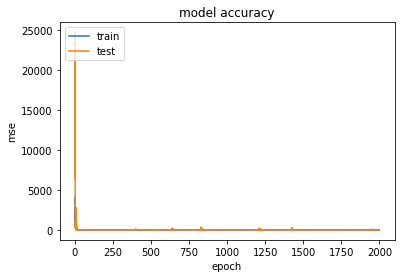

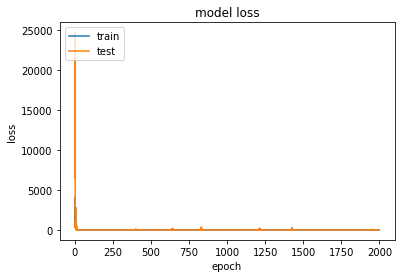

In [30]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# demonstrate prediction
x_input = array([50, 51, 52])
print("x_input.shape {}".format(x_input.shape))

x_input = x_input.reshape((1, 3, 1))
print("x_input.shape2 {}".format(x_input.shape))

x_input = tf.cast(x_input,tf.float32)
print("x_input {}".format(x_input))

yhat = model.predict(x_input, verbose=0)
print("yhat : ", yhat)

x_input.shape (3,)
x_input.shape2 (1, 3, 1)
x_input [[[50.]
  [51.]
  [52.]]]
yhat :  [[153.41109]]


In [0]:

# model2 = Sequential()
# model2.add(Dense(100, input_shape=(3, 1), activation='relu'))
# model2.add(Dense(1))
# model2.compile(optimizer='adam', loss='mse', metrics=['mse'])
# history = model2.fit(X, y, epochs=200, validation_split=0.1, batch_size=3, verbose=0)
# model2.summary()


In [0]:
# # list all data in history
# print(history.history.keys())

# # summarize history for accuracy
# plt.plot(history.history['mse'])
# plt.plot(history.history['val_mse'])
# plt.title('model accuracy')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [0]:
# # demonstrate prediction
# x_input = array([50, 51, 52])
# print("x_input.shape {}".format(x_input.shape))

# x_input = x_input.reshape((1, 3, 1))
# print("x_input.shape2 {}".format(x_input.shape))

# x_input = tf.cast(x_input,tf.float32)
# print("x_input {}".format(x_input))

# yhat = model2.predict(x_input, verbose=0)
# print("yhat : ", yhat)